# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [16]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

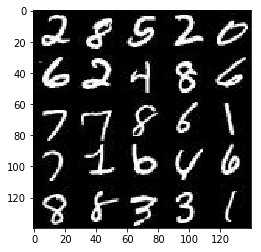

In [17]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

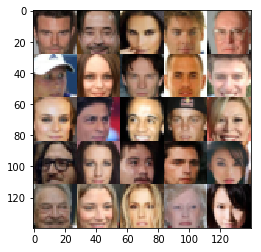

In [18]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [20]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    
    # TODO: Implement Function
    
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='real_input')
    z_data = tf.placeholder(tf.float32, (None, z_dim), name='z_data')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    return real_input, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [21]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        conv1 = tf.layers.conv2d(images, 32, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * conv1, conv1)
        # 14x14x64
        
        
        conv2 = tf.layers.conv2d(relu1, 64, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(conv2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
    
        conv3 = tf.layers.conv2d(relu2, 128, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(conv3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        
#         conv4 = tf.layers.conv2d(relu3, 256, 5, strides=2, padding='same')
#         bn4 = tf.layers.batch_normalization(conv4, training=True)
#         relu4 = tf.maximum(alpha * bn4, bn4)
#         # 2x2x512
        
        relu3_shape = relu3.get_shape().as_list()
        

        # Flatten it
        flat = tf.reshape(relu3, (-1, relu3_shape[1]*relu3_shape[2]*relu3_shape[3]))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
 
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [23]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse = not is_train):
        alpha = 0.1
        
        # First fully connected layer
        fc1 = tf.layers.dense(z, 4*4*512)
        
        # Reshape it to start the convolutional stack
        reshape1 = tf.reshape(fc1, (-1, 4, 4, 512))
        bn1 = tf.layers.batch_normalization(reshape1, training=is_train)
        relu1 = tf.maximum(alpha * bn1, bn1)
        # 4x4x512
        
        deconv2 = tf.layers.conv2d_transpose(relu1, 128, 4, strides=1, padding='valid')
        bn2 = tf.layers.batch_normalization(deconv2, training=is_train)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 4x4x256 
        
        deconv3 = tf.layers.conv2d_transpose(relu2, 64, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(deconv3, training=is_train)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 7x7x128 
        
        deconv4 = tf.layers.conv2d_transpose(relu3, 32, 5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(deconv4, training=is_train)
        relu4 = tf.maximum(alpha * bn4, bn4)
        # 14x14x64 
                
        # Output layer
        logits = tf.layers.conv2d_transpose(relu4, out_channel_dim, 3, strides=1, padding='same')
        output = tf.tanh(logits)
        # 28x28x3 
        
    return output

    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [24]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    #build the model
    g_model = generator(input_z, out_channel_dim)
    
    # g_model is the generator output
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    # Calculate losses
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [25]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get the trainable_variables, split into discriminator set and generator set
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [26]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [27]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    step = 0
        
    real_input, z_data, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(real_input, z_data, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_images = batch_images.reshape(batch_size, data_shape[1], data_shape[2], data_shape[3])
                batch_images *= 2
                step += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                 # Run optimizers twice
                _ = sess.run(d_opt, feed_dict={real_input:batch_images, z_data:batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={real_input:batch_images, z_data:batch_z, lr: learning_rate})
                
                _ = sess.run(d_opt, feed_dict={real_input:batch_images, z_data:batch_z, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={real_input:batch_images, z_data:batch_z, lr: learning_rate})
                
                 # At the end of each epoch, get the losses and print them out
                if step % 10 == 0:
                    train_loss_d = d_loss.eval({z_data: batch_z, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_data: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                
                if step % 100 ==0:
                    show_generator_output(sess, 20, z_data, data_shape[3], data_image_mode)


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.0218... Generator Loss: 0.8094
Epoch 1/2... Discriminator Loss: 0.6258... Generator Loss: 1.5294
Epoch 1/2... Discriminator Loss: 0.4002... Generator Loss: 2.9322
Epoch 1/2... Discriminator Loss: 0.9804... Generator Loss: 0.9870
Epoch 1/2... Discriminator Loss: 0.6264... Generator Loss: 1.9561
Epoch 1/2... Discriminator Loss: 0.4911... Generator Loss: 2.4663
Epoch 1/2... Discriminator Loss: 0.4637... Generator Loss: 2.3333
Epoch 1/2... Discriminator Loss: 0.4623... Generator Loss: 2.6222
Epoch 1/2... Discriminator Loss: 0.4651... Generator Loss: 2.9484
Epoch 1/2... Discriminator Loss: 0.4322... Generator Loss: 2.8416


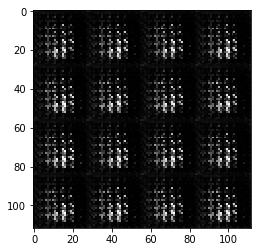

Epoch 1/2... Discriminator Loss: 0.4664... Generator Loss: 3.8905
Epoch 1/2... Discriminator Loss: 0.4488... Generator Loss: 2.6329
Epoch 1/2... Discriminator Loss: 0.4133... Generator Loss: 3.2117
Epoch 1/2... Discriminator Loss: 0.6450... Generator Loss: 1.8042
Epoch 1/2... Discriminator Loss: 0.9290... Generator Loss: 1.5313
Epoch 1/2... Discriminator Loss: 0.6452... Generator Loss: 2.0535
Epoch 1/2... Discriminator Loss: 1.2933... Generator Loss: 0.8870
Epoch 1/2... Discriminator Loss: 0.7311... Generator Loss: 1.7523
Epoch 1/2... Discriminator Loss: 0.7697... Generator Loss: 1.6074
Epoch 1/2... Discriminator Loss: 1.0082... Generator Loss: 1.3868


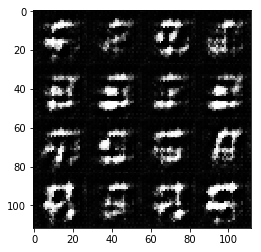

Epoch 1/2... Discriminator Loss: 1.0432... Generator Loss: 1.4479
Epoch 1/2... Discriminator Loss: 1.3264... Generator Loss: 0.9818
Epoch 1/2... Discriminator Loss: 1.2403... Generator Loss: 1.0648
Epoch 1/2... Discriminator Loss: 1.1722... Generator Loss: 0.9986
Epoch 1/2... Discriminator Loss: 1.3018... Generator Loss: 0.8801
Epoch 1/2... Discriminator Loss: 1.3623... Generator Loss: 0.9626
Epoch 1/2... Discriminator Loss: 1.1567... Generator Loss: 1.0924
Epoch 1/2... Discriminator Loss: 1.2130... Generator Loss: 0.9432
Epoch 1/2... Discriminator Loss: 1.2108... Generator Loss: 0.9631
Epoch 1/2... Discriminator Loss: 1.1923... Generator Loss: 0.9396


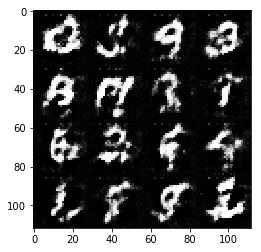

Epoch 1/2... Discriminator Loss: 1.1734... Generator Loss: 0.9666
Epoch 1/2... Discriminator Loss: 1.2405... Generator Loss: 0.8809
Epoch 1/2... Discriminator Loss: 1.0969... Generator Loss: 0.9986
Epoch 1/2... Discriminator Loss: 1.3370... Generator Loss: 0.8232
Epoch 1/2... Discriminator Loss: 1.2503... Generator Loss: 0.9258
Epoch 1/2... Discriminator Loss: 1.2942... Generator Loss: 0.8728
Epoch 1/2... Discriminator Loss: 1.2074... Generator Loss: 0.9355
Epoch 1/2... Discriminator Loss: 1.1928... Generator Loss: 0.8778
Epoch 1/2... Discriminator Loss: 1.3246... Generator Loss: 0.8806
Epoch 1/2... Discriminator Loss: 1.2096... Generator Loss: 0.9802


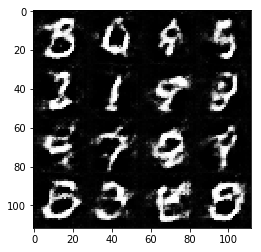

Epoch 1/2... Discriminator Loss: 1.2985... Generator Loss: 0.9223
Epoch 1/2... Discriminator Loss: 1.0899... Generator Loss: 1.0468
Epoch 1/2... Discriminator Loss: 1.1732... Generator Loss: 0.9553
Epoch 1/2... Discriminator Loss: 1.2075... Generator Loss: 0.9249
Epoch 1/2... Discriminator Loss: 1.3150... Generator Loss: 0.9307
Epoch 1/2... Discriminator Loss: 1.1957... Generator Loss: 0.9672
Epoch 1/2... Discriminator Loss: 1.1478... Generator Loss: 0.9350
Epoch 1/2... Discriminator Loss: 1.2819... Generator Loss: 0.8892
Epoch 1/2... Discriminator Loss: 1.2868... Generator Loss: 0.7916
Epoch 1/2... Discriminator Loss: 1.2450... Generator Loss: 0.9188


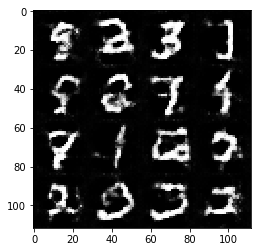

Epoch 1/2... Discriminator Loss: 1.2047... Generator Loss: 1.0464
Epoch 1/2... Discriminator Loss: 1.2796... Generator Loss: 0.7725
Epoch 1/2... Discriminator Loss: 1.2408... Generator Loss: 0.9133
Epoch 1/2... Discriminator Loss: 1.3011... Generator Loss: 0.8671
Epoch 1/2... Discriminator Loss: 1.2584... Generator Loss: 0.8833
Epoch 1/2... Discriminator Loss: 1.2817... Generator Loss: 0.8794
Epoch 1/2... Discriminator Loss: 1.2010... Generator Loss: 0.9108
Epoch 1/2... Discriminator Loss: 1.2979... Generator Loss: 0.8452
Epoch 1/2... Discriminator Loss: 1.2383... Generator Loss: 0.9343
Epoch 1/2... Discriminator Loss: 1.2025... Generator Loss: 0.9413


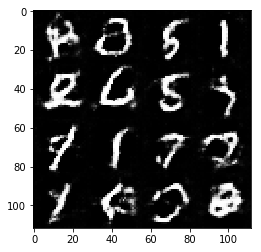

Epoch 1/2... Discriminator Loss: 1.2694... Generator Loss: 0.8693
Epoch 1/2... Discriminator Loss: 1.1431... Generator Loss: 0.9761
Epoch 1/2... Discriminator Loss: 1.2779... Generator Loss: 0.9182
Epoch 1/2... Discriminator Loss: 1.1177... Generator Loss: 0.9703
Epoch 1/2... Discriminator Loss: 1.1669... Generator Loss: 0.9237
Epoch 1/2... Discriminator Loss: 1.2505... Generator Loss: 0.8420
Epoch 1/2... Discriminator Loss: 1.2162... Generator Loss: 0.9683
Epoch 1/2... Discriminator Loss: 1.2635... Generator Loss: 0.8285
Epoch 1/2... Discriminator Loss: 1.0944... Generator Loss: 0.9712
Epoch 1/2... Discriminator Loss: 1.2369... Generator Loss: 0.9867


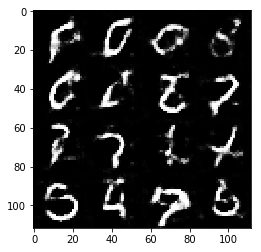

Epoch 1/2... Discriminator Loss: 1.0841... Generator Loss: 1.1170
Epoch 1/2... Discriminator Loss: 1.1265... Generator Loss: 0.9651
Epoch 1/2... Discriminator Loss: 1.1422... Generator Loss: 1.0287
Epoch 1/2... Discriminator Loss: 1.2203... Generator Loss: 0.9005
Epoch 1/2... Discriminator Loss: 1.0954... Generator Loss: 1.0211
Epoch 1/2... Discriminator Loss: 1.1571... Generator Loss: 1.0055
Epoch 1/2... Discriminator Loss: 1.1807... Generator Loss: 0.9496
Epoch 1/2... Discriminator Loss: 1.1713... Generator Loss: 0.9602
Epoch 1/2... Discriminator Loss: 1.1126... Generator Loss: 0.9362
Epoch 1/2... Discriminator Loss: 1.2117... Generator Loss: 0.9325


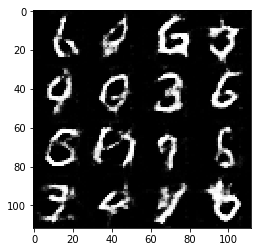

Epoch 1/2... Discriminator Loss: 1.1262... Generator Loss: 0.9978
Epoch 1/2... Discriminator Loss: 1.1797... Generator Loss: 0.9246
Epoch 1/2... Discriminator Loss: 1.1594... Generator Loss: 0.9794
Epoch 1/2... Discriminator Loss: 1.1891... Generator Loss: 0.8978
Epoch 1/2... Discriminator Loss: 1.1608... Generator Loss: 0.9490
Epoch 1/2... Discriminator Loss: 1.1597... Generator Loss: 0.9822
Epoch 1/2... Discriminator Loss: 1.1625... Generator Loss: 0.9548
Epoch 1/2... Discriminator Loss: 1.0780... Generator Loss: 1.0474
Epoch 1/2... Discriminator Loss: 1.2377... Generator Loss: 0.9511
Epoch 1/2... Discriminator Loss: 1.2437... Generator Loss: 0.8834


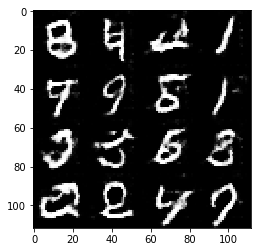

Epoch 1/2... Discriminator Loss: 1.2393... Generator Loss: 0.8177
Epoch 1/2... Discriminator Loss: 1.1136... Generator Loss: 0.9723
Epoch 1/2... Discriminator Loss: 1.1214... Generator Loss: 0.9501
Epoch 1/2... Discriminator Loss: 1.1807... Generator Loss: 0.9519
Epoch 1/2... Discriminator Loss: 1.1544... Generator Loss: 0.9682
Epoch 1/2... Discriminator Loss: 1.2561... Generator Loss: 0.9159
Epoch 1/2... Discriminator Loss: 1.1806... Generator Loss: 0.9855
Epoch 1/2... Discriminator Loss: 1.2755... Generator Loss: 0.9813
Epoch 1/2... Discriminator Loss: 1.2190... Generator Loss: 0.9134
Epoch 1/2... Discriminator Loss: 1.1335... Generator Loss: 1.0338


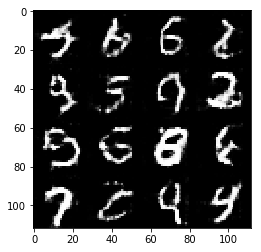

Epoch 1/2... Discriminator Loss: 1.1377... Generator Loss: 0.9728
Epoch 1/2... Discriminator Loss: 1.0892... Generator Loss: 0.9944
Epoch 1/2... Discriminator Loss: 1.0747... Generator Loss: 1.0514
Epoch 1/2... Discriminator Loss: 1.2125... Generator Loss: 0.8824
Epoch 1/2... Discriminator Loss: 1.0726... Generator Loss: 1.0231
Epoch 1/2... Discriminator Loss: 1.1690... Generator Loss: 0.9116
Epoch 1/2... Discriminator Loss: 1.2208... Generator Loss: 0.8916
Epoch 1/2... Discriminator Loss: 1.0894... Generator Loss: 1.0005
Epoch 1/2... Discriminator Loss: 1.2175... Generator Loss: 0.9197
Epoch 1/2... Discriminator Loss: 1.1274... Generator Loss: 0.9432


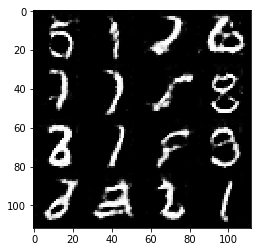

Epoch 1/2... Discriminator Loss: 1.0836... Generator Loss: 1.0445
Epoch 1/2... Discriminator Loss: 1.1502... Generator Loss: 0.9945
Epoch 1/2... Discriminator Loss: 1.1758... Generator Loss: 0.8439
Epoch 1/2... Discriminator Loss: 1.1018... Generator Loss: 0.9484
Epoch 1/2... Discriminator Loss: 1.1783... Generator Loss: 0.9060
Epoch 1/2... Discriminator Loss: 1.2263... Generator Loss: 0.9407
Epoch 1/2... Discriminator Loss: 1.2335... Generator Loss: 0.9256
Epoch 1/2... Discriminator Loss: 1.1740... Generator Loss: 1.0137
Epoch 1/2... Discriminator Loss: 1.0379... Generator Loss: 1.0711
Epoch 1/2... Discriminator Loss: 1.0914... Generator Loss: 1.0201


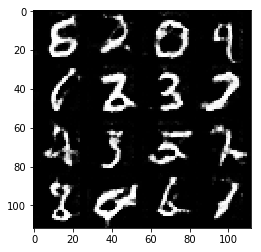

Epoch 1/2... Discriminator Loss: 1.1163... Generator Loss: 0.9658
Epoch 1/2... Discriminator Loss: 1.2586... Generator Loss: 0.7910
Epoch 1/2... Discriminator Loss: 1.1876... Generator Loss: 0.9558
Epoch 1/2... Discriminator Loss: 1.2374... Generator Loss: 0.8748
Epoch 1/2... Discriminator Loss: 1.2215... Generator Loss: 0.9322
Epoch 1/2... Discriminator Loss: 1.1168... Generator Loss: 1.0399
Epoch 1/2... Discriminator Loss: 1.1316... Generator Loss: 0.9974
Epoch 1/2... Discriminator Loss: 1.1357... Generator Loss: 0.9332
Epoch 1/2... Discriminator Loss: 1.1765... Generator Loss: 0.7976
Epoch 1/2... Discriminator Loss: 1.1867... Generator Loss: 0.8070


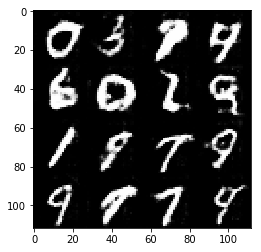

Epoch 1/2... Discriminator Loss: 1.1651... Generator Loss: 1.0106
Epoch 1/2... Discriminator Loss: 1.2617... Generator Loss: 0.9251
Epoch 1/2... Discriminator Loss: 1.1231... Generator Loss: 0.9655
Epoch 1/2... Discriminator Loss: 1.0871... Generator Loss: 0.9255
Epoch 1/2... Discriminator Loss: 1.0868... Generator Loss: 0.9145
Epoch 1/2... Discriminator Loss: 1.1668... Generator Loss: 0.9849
Epoch 1/2... Discriminator Loss: 1.2847... Generator Loss: 0.8806
Epoch 1/2... Discriminator Loss: 1.1542... Generator Loss: 0.8794
Epoch 1/2... Discriminator Loss: 1.0867... Generator Loss: 0.9379
Epoch 1/2... Discriminator Loss: 1.2169... Generator Loss: 0.9218


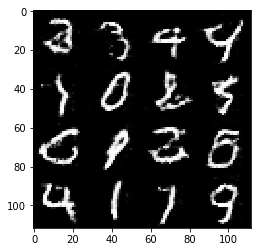

Epoch 1/2... Discriminator Loss: 1.1111... Generator Loss: 1.1447
Epoch 1/2... Discriminator Loss: 1.2273... Generator Loss: 0.7800
Epoch 1/2... Discriminator Loss: 1.2578... Generator Loss: 0.7534
Epoch 1/2... Discriminator Loss: 1.0110... Generator Loss: 1.1031
Epoch 1/2... Discriminator Loss: 1.1821... Generator Loss: 0.9082
Epoch 1/2... Discriminator Loss: 1.1841... Generator Loss: 0.9973
Epoch 1/2... Discriminator Loss: 1.2029... Generator Loss: 0.9608
Epoch 1/2... Discriminator Loss: 1.3277... Generator Loss: 0.8116
Epoch 1/2... Discriminator Loss: 1.0196... Generator Loss: 1.1111
Epoch 1/2... Discriminator Loss: 1.1662... Generator Loss: 0.9996


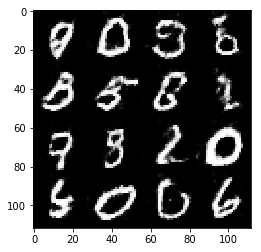

Epoch 1/2... Discriminator Loss: 1.1531... Generator Loss: 0.8745
Epoch 1/2... Discriminator Loss: 1.2528... Generator Loss: 0.8101
Epoch 1/2... Discriminator Loss: 1.1981... Generator Loss: 0.7922
Epoch 1/2... Discriminator Loss: 1.2219... Generator Loss: 0.8608
Epoch 1/2... Discriminator Loss: 1.1917... Generator Loss: 0.9236
Epoch 1/2... Discriminator Loss: 1.4217... Generator Loss: 0.7242
Epoch 1/2... Discriminator Loss: 1.2188... Generator Loss: 0.9155
Epoch 1/2... Discriminator Loss: 1.2389... Generator Loss: 0.8750
Epoch 1/2... Discriminator Loss: 1.1012... Generator Loss: 0.9465
Epoch 1/2... Discriminator Loss: 1.1127... Generator Loss: 0.9553


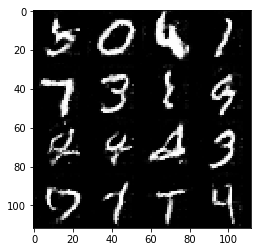

Epoch 1/2... Discriminator Loss: 1.0524... Generator Loss: 1.0068
Epoch 1/2... Discriminator Loss: 1.1671... Generator Loss: 1.0027
Epoch 1/2... Discriminator Loss: 1.1246... Generator Loss: 1.0249
Epoch 1/2... Discriminator Loss: 1.0840... Generator Loss: 1.0880
Epoch 1/2... Discriminator Loss: 1.2029... Generator Loss: 0.8089
Epoch 1/2... Discriminator Loss: 1.3385... Generator Loss: 0.7683
Epoch 1/2... Discriminator Loss: 1.1975... Generator Loss: 0.8798
Epoch 1/2... Discriminator Loss: 1.1418... Generator Loss: 0.8782
Epoch 1/2... Discriminator Loss: 1.1338... Generator Loss: 0.9044
Epoch 1/2... Discriminator Loss: 1.2406... Generator Loss: 0.8281


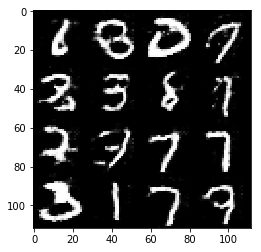

Epoch 1/2... Discriminator Loss: 1.4526... Generator Loss: 0.7597
Epoch 1/2... Discriminator Loss: 1.0969... Generator Loss: 0.9259
Epoch 1/2... Discriminator Loss: 1.1465... Generator Loss: 1.0516
Epoch 1/2... Discriminator Loss: 1.2251... Generator Loss: 0.8658
Epoch 1/2... Discriminator Loss: 1.1176... Generator Loss: 1.0977
Epoch 1/2... Discriminator Loss: 1.1975... Generator Loss: 0.9104
Epoch 1/2... Discriminator Loss: 1.0730... Generator Loss: 1.0215
Epoch 1/2... Discriminator Loss: 1.2182... Generator Loss: 0.7979
Epoch 1/2... Discriminator Loss: 1.2380... Generator Loss: 0.9507
Epoch 1/2... Discriminator Loss: 1.1097... Generator Loss: 1.0895


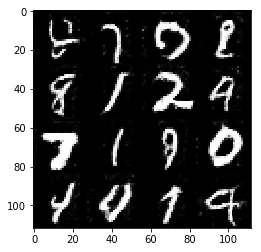

Epoch 1/2... Discriminator Loss: 1.2035... Generator Loss: 0.9222
Epoch 1/2... Discriminator Loss: 1.1035... Generator Loss: 1.0087
Epoch 1/2... Discriminator Loss: 1.1262... Generator Loss: 1.0032
Epoch 1/2... Discriminator Loss: 1.1519... Generator Loss: 0.9496
Epoch 1/2... Discriminator Loss: 1.1498... Generator Loss: 0.8457
Epoch 1/2... Discriminator Loss: 1.1779... Generator Loss: 0.8881
Epoch 1/2... Discriminator Loss: 1.3415... Generator Loss: 0.8596
Epoch 2/2... Discriminator Loss: 1.1561... Generator Loss: 0.8731
Epoch 2/2... Discriminator Loss: 1.2887... Generator Loss: 0.7029
Epoch 2/2... Discriminator Loss: 1.0805... Generator Loss: 0.9735


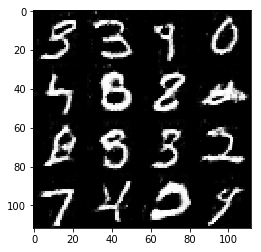

Epoch 2/2... Discriminator Loss: 1.1707... Generator Loss: 0.9186
Epoch 2/2... Discriminator Loss: 1.1021... Generator Loss: 0.9065
Epoch 2/2... Discriminator Loss: 1.2034... Generator Loss: 0.8600
Epoch 2/2... Discriminator Loss: 1.2117... Generator Loss: 0.7497
Epoch 2/2... Discriminator Loss: 1.2176... Generator Loss: 0.9396
Epoch 2/2... Discriminator Loss: 1.0549... Generator Loss: 0.9312
Epoch 2/2... Discriminator Loss: 1.2176... Generator Loss: 0.7658
Epoch 2/2... Discriminator Loss: 1.2813... Generator Loss: 0.7391
Epoch 2/2... Discriminator Loss: 1.2884... Generator Loss: 0.9206
Epoch 2/2... Discriminator Loss: 1.1410... Generator Loss: 0.8320


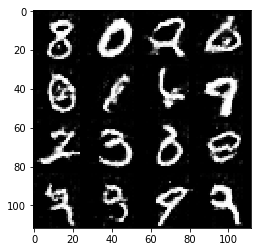

Epoch 2/2... Discriminator Loss: 1.1533... Generator Loss: 0.8620
Epoch 2/2... Discriminator Loss: 1.1892... Generator Loss: 0.8443
Epoch 2/2... Discriminator Loss: 1.3237... Generator Loss: 0.7879
Epoch 2/2... Discriminator Loss: 1.2621... Generator Loss: 0.9414
Epoch 2/2... Discriminator Loss: 1.0557... Generator Loss: 1.0391
Epoch 2/2... Discriminator Loss: 1.2742... Generator Loss: 0.7981
Epoch 2/2... Discriminator Loss: 1.2086... Generator Loss: 0.8487
Epoch 2/2... Discriminator Loss: 1.1264... Generator Loss: 1.0253
Epoch 2/2... Discriminator Loss: 1.1478... Generator Loss: 0.8093
Epoch 2/2... Discriminator Loss: 1.1588... Generator Loss: 0.9029


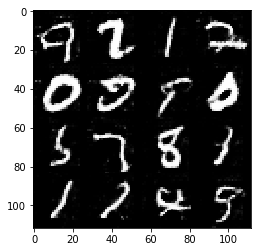

Epoch 2/2... Discriminator Loss: 1.2424... Generator Loss: 0.8448
Epoch 2/2... Discriminator Loss: 1.1730... Generator Loss: 0.8690
Epoch 2/2... Discriminator Loss: 1.1630... Generator Loss: 0.8915
Epoch 2/2... Discriminator Loss: 1.1898... Generator Loss: 0.9119
Epoch 2/2... Discriminator Loss: 1.1844... Generator Loss: 0.8029
Epoch 2/2... Discriminator Loss: 1.1034... Generator Loss: 0.8969
Epoch 2/2... Discriminator Loss: 1.0454... Generator Loss: 1.1571
Epoch 2/2... Discriminator Loss: 1.1385... Generator Loss: 0.9576
Epoch 2/2... Discriminator Loss: 1.1263... Generator Loss: 0.8407
Epoch 2/2... Discriminator Loss: 1.1749... Generator Loss: 1.0308


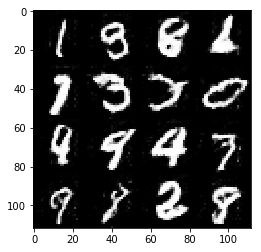

Epoch 2/2... Discriminator Loss: 1.1140... Generator Loss: 1.0188
Epoch 2/2... Discriminator Loss: 1.1664... Generator Loss: 0.9877
Epoch 2/2... Discriminator Loss: 1.0447... Generator Loss: 0.9805
Epoch 2/2... Discriminator Loss: 1.3140... Generator Loss: 0.8347
Epoch 2/2... Discriminator Loss: 1.1026... Generator Loss: 0.9537
Epoch 2/2... Discriminator Loss: 1.1889... Generator Loss: 0.8511
Epoch 2/2... Discriminator Loss: 1.3585... Generator Loss: 0.7086
Epoch 2/2... Discriminator Loss: 1.0295... Generator Loss: 1.0390
Epoch 2/2... Discriminator Loss: 1.1267... Generator Loss: 0.9444
Epoch 2/2... Discriminator Loss: 1.2163... Generator Loss: 0.8219


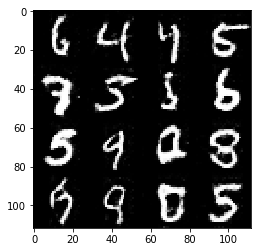

Epoch 2/2... Discriminator Loss: 0.9882... Generator Loss: 1.0923
Epoch 2/2... Discriminator Loss: 1.0857... Generator Loss: 1.0457
Epoch 2/2... Discriminator Loss: 1.1200... Generator Loss: 0.8811
Epoch 2/2... Discriminator Loss: 1.2274... Generator Loss: 0.8283
Epoch 2/2... Discriminator Loss: 1.0694... Generator Loss: 1.0627
Epoch 2/2... Discriminator Loss: 1.2447... Generator Loss: 0.8147
Epoch 2/2... Discriminator Loss: 1.0780... Generator Loss: 0.9220
Epoch 2/2... Discriminator Loss: 1.2007... Generator Loss: 0.8867
Epoch 2/2... Discriminator Loss: 1.1348... Generator Loss: 0.9510
Epoch 2/2... Discriminator Loss: 1.2081... Generator Loss: 0.9345


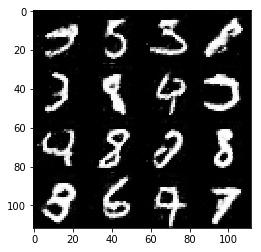

Epoch 2/2... Discriminator Loss: 1.1719... Generator Loss: 0.9315
Epoch 2/2... Discriminator Loss: 1.2713... Generator Loss: 0.7785
Epoch 2/2... Discriminator Loss: 1.1788... Generator Loss: 0.8878
Epoch 2/2... Discriminator Loss: 1.2154... Generator Loss: 0.7428
Epoch 2/2... Discriminator Loss: 1.1917... Generator Loss: 0.8759
Epoch 2/2... Discriminator Loss: 1.2533... Generator Loss: 0.8625
Epoch 2/2... Discriminator Loss: 1.1737... Generator Loss: 0.8936
Epoch 2/2... Discriminator Loss: 1.2276... Generator Loss: 1.0380
Epoch 2/2... Discriminator Loss: 1.2427... Generator Loss: 0.8946
Epoch 2/2... Discriminator Loss: 1.1722... Generator Loss: 0.7993


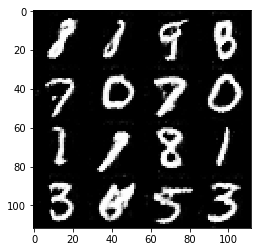

Epoch 2/2... Discriminator Loss: 1.1047... Generator Loss: 0.9382
Epoch 2/2... Discriminator Loss: 1.1315... Generator Loss: 0.9980
Epoch 2/2... Discriminator Loss: 1.0565... Generator Loss: 1.0443
Epoch 2/2... Discriminator Loss: 1.1321... Generator Loss: 0.9987
Epoch 2/2... Discriminator Loss: 1.3163... Generator Loss: 0.7775
Epoch 2/2... Discriminator Loss: 1.1833... Generator Loss: 0.8937
Epoch 2/2... Discriminator Loss: 1.1111... Generator Loss: 0.9251
Epoch 2/2... Discriminator Loss: 1.2091... Generator Loss: 0.8414
Epoch 2/2... Discriminator Loss: 1.1668... Generator Loss: 0.9734
Epoch 2/2... Discriminator Loss: 1.2661... Generator Loss: 0.8415


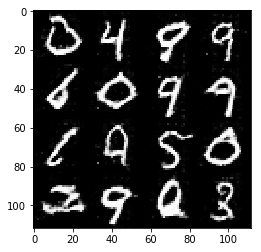

Epoch 2/2... Discriminator Loss: 1.2579... Generator Loss: 0.8231
Epoch 2/2... Discriminator Loss: 1.1047... Generator Loss: 0.9877
Epoch 2/2... Discriminator Loss: 1.1937... Generator Loss: 0.8523
Epoch 2/2... Discriminator Loss: 1.1290... Generator Loss: 0.9274
Epoch 2/2... Discriminator Loss: 1.1783... Generator Loss: 0.8431
Epoch 2/2... Discriminator Loss: 1.2328... Generator Loss: 0.8485
Epoch 2/2... Discriminator Loss: 1.1233... Generator Loss: 0.8070
Epoch 2/2... Discriminator Loss: 1.1951... Generator Loss: 0.9084
Epoch 2/2... Discriminator Loss: 1.2452... Generator Loss: 0.8702
Epoch 2/2... Discriminator Loss: 0.9765... Generator Loss: 1.1500


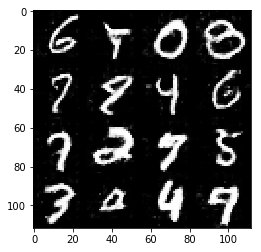

Epoch 2/2... Discriminator Loss: 1.1801... Generator Loss: 0.8394
Epoch 2/2... Discriminator Loss: 1.1734... Generator Loss: 0.8898
Epoch 2/2... Discriminator Loss: 1.1735... Generator Loss: 0.9731
Epoch 2/2... Discriminator Loss: 1.3076... Generator Loss: 0.7182
Epoch 2/2... Discriminator Loss: 1.1066... Generator Loss: 0.9859
Epoch 2/2... Discriminator Loss: 1.1560... Generator Loss: 0.9584
Epoch 2/2... Discriminator Loss: 1.2748... Generator Loss: 0.8250
Epoch 2/2... Discriminator Loss: 1.2256... Generator Loss: 0.9239
Epoch 2/2... Discriminator Loss: 1.0382... Generator Loss: 0.9531
Epoch 2/2... Discriminator Loss: 1.1122... Generator Loss: 0.9675


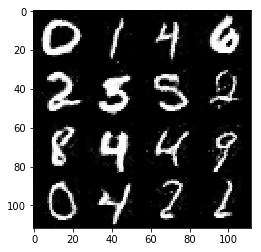

Epoch 2/2... Discriminator Loss: 1.2592... Generator Loss: 0.9391
Epoch 2/2... Discriminator Loss: 1.2582... Generator Loss: 0.7413
Epoch 2/2... Discriminator Loss: 1.1033... Generator Loss: 0.9651
Epoch 2/2... Discriminator Loss: 1.0775... Generator Loss: 0.9246
Epoch 2/2... Discriminator Loss: 1.2122... Generator Loss: 0.8750
Epoch 2/2... Discriminator Loss: 1.0587... Generator Loss: 1.1406
Epoch 2/2... Discriminator Loss: 1.2287... Generator Loss: 0.9900
Epoch 2/2... Discriminator Loss: 1.0832... Generator Loss: 1.0255
Epoch 2/2... Discriminator Loss: 1.1910... Generator Loss: 0.9598
Epoch 2/2... Discriminator Loss: 1.1448... Generator Loss: 0.8773


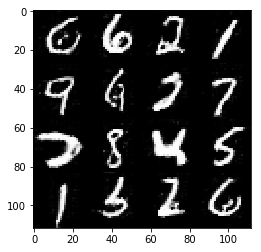

Epoch 2/2... Discriminator Loss: 1.1486... Generator Loss: 0.9012
Epoch 2/2... Discriminator Loss: 0.9763... Generator Loss: 1.0399
Epoch 2/2... Discriminator Loss: 1.2167... Generator Loss: 0.7780
Epoch 2/2... Discriminator Loss: 1.1600... Generator Loss: 0.8531
Epoch 2/2... Discriminator Loss: 1.2487... Generator Loss: 0.8663
Epoch 2/2... Discriminator Loss: 1.0919... Generator Loss: 0.9662
Epoch 2/2... Discriminator Loss: 1.2264... Generator Loss: 0.8202
Epoch 2/2... Discriminator Loss: 1.1925... Generator Loss: 0.9441
Epoch 2/2... Discriminator Loss: 1.2340... Generator Loss: 0.8254
Epoch 2/2... Discriminator Loss: 1.0746... Generator Loss: 0.8847


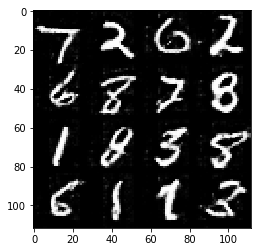

Epoch 2/2... Discriminator Loss: 1.1515... Generator Loss: 0.9052
Epoch 2/2... Discriminator Loss: 1.1516... Generator Loss: 0.9067
Epoch 2/2... Discriminator Loss: 1.0949... Generator Loss: 0.9991
Epoch 2/2... Discriminator Loss: 1.0872... Generator Loss: 1.0374
Epoch 2/2... Discriminator Loss: 1.1886... Generator Loss: 0.8055
Epoch 2/2... Discriminator Loss: 1.2753... Generator Loss: 0.7393
Epoch 2/2... Discriminator Loss: 1.1000... Generator Loss: 0.8913
Epoch 2/2... Discriminator Loss: 1.0825... Generator Loss: 0.9570
Epoch 2/2... Discriminator Loss: 1.1768... Generator Loss: 0.8102
Epoch 2/2... Discriminator Loss: 1.1173... Generator Loss: 0.9385


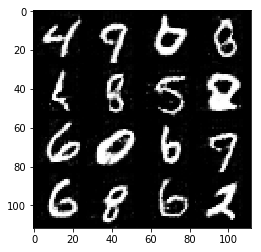

Epoch 2/2... Discriminator Loss: 1.0880... Generator Loss: 0.9888
Epoch 2/2... Discriminator Loss: 1.1128... Generator Loss: 0.9120
Epoch 2/2... Discriminator Loss: 1.1155... Generator Loss: 0.9488
Epoch 2/2... Discriminator Loss: 1.2469... Generator Loss: 0.8553
Epoch 2/2... Discriminator Loss: 1.2312... Generator Loss: 0.8444
Epoch 2/2... Discriminator Loss: 1.0398... Generator Loss: 1.0589
Epoch 2/2... Discriminator Loss: 1.2676... Generator Loss: 0.7801
Epoch 2/2... Discriminator Loss: 1.1467... Generator Loss: 0.9895
Epoch 2/2... Discriminator Loss: 1.0997... Generator Loss: 0.9916
Epoch 2/2... Discriminator Loss: 1.1032... Generator Loss: 0.9067


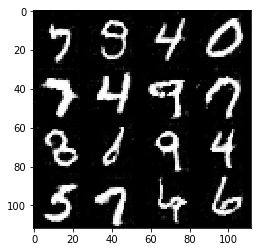

Epoch 2/2... Discriminator Loss: 1.1169... Generator Loss: 0.8890
Epoch 2/2... Discriminator Loss: 1.1532... Generator Loss: 1.0961
Epoch 2/2... Discriminator Loss: 1.1949... Generator Loss: 0.9316
Epoch 2/2... Discriminator Loss: 1.1339... Generator Loss: 0.9823
Epoch 2/2... Discriminator Loss: 1.2331... Generator Loss: 0.7635
Epoch 2/2... Discriminator Loss: 1.0168... Generator Loss: 1.0603
Epoch 2/2... Discriminator Loss: 1.2125... Generator Loss: 0.8842
Epoch 2/2... Discriminator Loss: 1.0285... Generator Loss: 0.9858
Epoch 2/2... Discriminator Loss: 1.1890... Generator Loss: 0.9517
Epoch 2/2... Discriminator Loss: 1.1547... Generator Loss: 0.9818


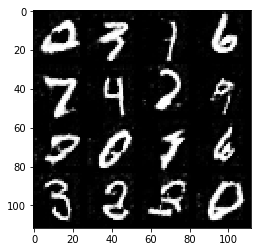

Epoch 2/2... Discriminator Loss: 1.0946... Generator Loss: 0.8838
Epoch 2/2... Discriminator Loss: 1.1344... Generator Loss: 0.8620
Epoch 2/2... Discriminator Loss: 1.2183... Generator Loss: 0.9298
Epoch 2/2... Discriminator Loss: 1.2347... Generator Loss: 0.8394
Epoch 2/2... Discriminator Loss: 1.1862... Generator Loss: 0.7755
Epoch 2/2... Discriminator Loss: 1.1666... Generator Loss: 0.9179
Epoch 2/2... Discriminator Loss: 1.1223... Generator Loss: 1.0307
Epoch 2/2... Discriminator Loss: 1.2333... Generator Loss: 0.8397
Epoch 2/2... Discriminator Loss: 1.0746... Generator Loss: 1.0982
Epoch 2/2... Discriminator Loss: 1.0589... Generator Loss: 1.2562


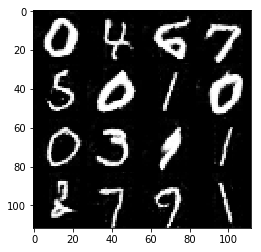

Epoch 2/2... Discriminator Loss: 1.2276... Generator Loss: 0.9392
Epoch 2/2... Discriminator Loss: 1.2607... Generator Loss: 0.7677
Epoch 2/2... Discriminator Loss: 1.1173... Generator Loss: 0.8770
Epoch 2/2... Discriminator Loss: 1.1149... Generator Loss: 0.9004
Epoch 2/2... Discriminator Loss: 1.1470... Generator Loss: 0.9174
Epoch 2/2... Discriminator Loss: 1.0744... Generator Loss: 0.9366
Epoch 2/2... Discriminator Loss: 1.1843... Generator Loss: 0.9448
Epoch 2/2... Discriminator Loss: 1.0941... Generator Loss: 0.9781
Epoch 2/2... Discriminator Loss: 1.1906... Generator Loss: 0.9641
Epoch 2/2... Discriminator Loss: 1.1753... Generator Loss: 0.9117


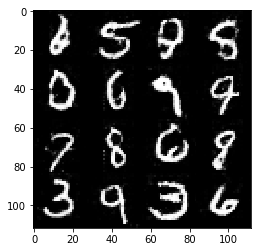

Epoch 2/2... Discriminator Loss: 1.1722... Generator Loss: 0.9153
Epoch 2/2... Discriminator Loss: 1.1161... Generator Loss: 0.9744
Epoch 2/2... Discriminator Loss: 1.0336... Generator Loss: 0.9884
Epoch 2/2... Discriminator Loss: 1.3145... Generator Loss: 0.8545
Epoch 2/2... Discriminator Loss: 1.1084... Generator Loss: 0.9566
Epoch 2/2... Discriminator Loss: 1.1301... Generator Loss: 0.9489
Epoch 2/2... Discriminator Loss: 1.0965... Generator Loss: 1.0124
Epoch 2/2... Discriminator Loss: 1.1648... Generator Loss: 0.9769
Epoch 2/2... Discriminator Loss: 0.9937... Generator Loss: 1.0067
Epoch 2/2... Discriminator Loss: 1.0380... Generator Loss: 1.0433


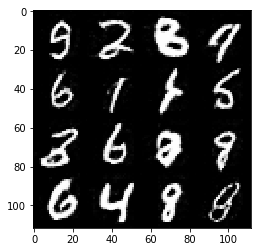

Epoch 2/2... Discriminator Loss: 1.0596... Generator Loss: 1.0672
Epoch 2/2... Discriminator Loss: 1.1725... Generator Loss: 0.8271
Epoch 2/2... Discriminator Loss: 1.1656... Generator Loss: 0.9573
Epoch 2/2... Discriminator Loss: 1.1897... Generator Loss: 0.9082
Epoch 2/2... Discriminator Loss: 1.0456... Generator Loss: 0.9124
Epoch 2/2... Discriminator Loss: 1.2703... Generator Loss: 0.9281
Epoch 2/2... Discriminator Loss: 1.2145... Generator Loss: 0.7797
Epoch 2/2... Discriminator Loss: 1.0238... Generator Loss: 1.1081
Epoch 2/2... Discriminator Loss: 1.2084... Generator Loss: 0.8356
Epoch 2/2... Discriminator Loss: 1.2439... Generator Loss: 0.8845


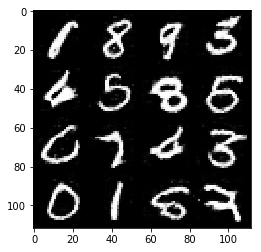

Epoch 2/2... Discriminator Loss: 1.2209... Generator Loss: 0.7089
Epoch 2/2... Discriminator Loss: 1.0861... Generator Loss: 0.9445
Epoch 2/2... Discriminator Loss: 1.1590... Generator Loss: 0.9255
Epoch 2/2... Discriminator Loss: 1.1701... Generator Loss: 0.9322
Epoch 2/2... Discriminator Loss: 1.1944... Generator Loss: 0.8158


In [30]:
batch_size = 32
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.9355... Generator Loss: 7.9913
Epoch 1/1... Discriminator Loss: 1.8409... Generator Loss: 0.3205
Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 2.3338
Epoch 1/1... Discriminator Loss: 1.3370... Generator Loss: 1.3132
Epoch 1/1... Discriminator Loss: 1.1741... Generator Loss: 1.6320
Epoch 1/1... Discriminator Loss: 1.4281... Generator Loss: 0.9084
Epoch 1/1... Discriminator Loss: 1.2182... Generator Loss: 1.0777
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.9698
Epoch 1/1... Discriminator Loss: 1.5547... Generator Loss: 1.0142
Epoch 1/1... Discriminator Loss: 1.1929... Generator Loss: 1.4923


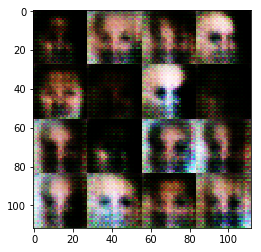

Epoch 1/1... Discriminator Loss: 1.3826... Generator Loss: 1.0960
Epoch 1/1... Discriminator Loss: 1.2444... Generator Loss: 1.1057
Epoch 1/1... Discriminator Loss: 1.6086... Generator Loss: 1.3666
Epoch 1/1... Discriminator Loss: 1.3330... Generator Loss: 0.9748
Epoch 1/1... Discriminator Loss: 1.3847... Generator Loss: 1.2285
Epoch 1/1... Discriminator Loss: 1.3829... Generator Loss: 0.8279
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.8634
Epoch 1/1... Discriminator Loss: 1.3596... Generator Loss: 0.7169
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.8672
Epoch 1/1... Discriminator Loss: 1.4655... Generator Loss: 0.9275


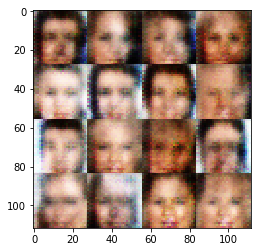

Epoch 1/1... Discriminator Loss: 1.4807... Generator Loss: 1.0082
Epoch 1/1... Discriminator Loss: 1.4253... Generator Loss: 0.8496
Epoch 1/1... Discriminator Loss: 1.3630... Generator Loss: 0.8487
Epoch 1/1... Discriminator Loss: 1.3221... Generator Loss: 1.0530
Epoch 1/1... Discriminator Loss: 1.3445... Generator Loss: 0.9972
Epoch 1/1... Discriminator Loss: 1.3694... Generator Loss: 0.7917
Epoch 1/1... Discriminator Loss: 1.3423... Generator Loss: 0.8097
Epoch 1/1... Discriminator Loss: 1.4927... Generator Loss: 0.7821
Epoch 1/1... Discriminator Loss: 1.2775... Generator Loss: 0.8474
Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 1.1531


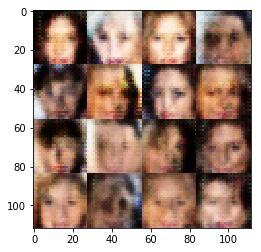

Epoch 1/1... Discriminator Loss: 1.4588... Generator Loss: 1.0258
Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 0.9589
Epoch 1/1... Discriminator Loss: 1.4753... Generator Loss: 1.0750
Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.8588
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.7947
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.8331
Epoch 1/1... Discriminator Loss: 1.3620... Generator Loss: 0.7926
Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.9335
Epoch 1/1... Discriminator Loss: 1.3969... Generator Loss: 0.7899
Epoch 1/1... Discriminator Loss: 1.4285... Generator Loss: 0.9290


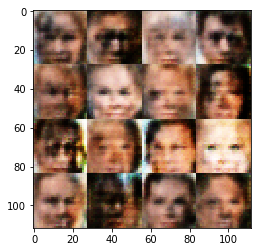

Epoch 1/1... Discriminator Loss: 1.4333... Generator Loss: 0.8231
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.8066
Epoch 1/1... Discriminator Loss: 1.3969... Generator Loss: 0.8378
Epoch 1/1... Discriminator Loss: 1.3174... Generator Loss: 0.8353
Epoch 1/1... Discriminator Loss: 1.3657... Generator Loss: 0.8030
Epoch 1/1... Discriminator Loss: 1.3530... Generator Loss: 0.8699
Epoch 1/1... Discriminator Loss: 1.3353... Generator Loss: 0.8106
Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 0.9236
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.8495
Epoch 1/1... Discriminator Loss: 1.3403... Generator Loss: 0.7574


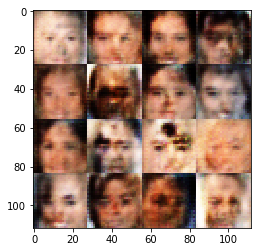

Epoch 1/1... Discriminator Loss: 1.4287... Generator Loss: 0.8692
Epoch 1/1... Discriminator Loss: 1.3645... Generator Loss: 0.7542
Epoch 1/1... Discriminator Loss: 1.3809... Generator Loss: 0.7784
Epoch 1/1... Discriminator Loss: 1.5714... Generator Loss: 1.2921
Epoch 1/1... Discriminator Loss: 1.4079... Generator Loss: 0.8783
Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.8778
Epoch 1/1... Discriminator Loss: 1.3870... Generator Loss: 0.8158
Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.7888
Epoch 1/1... Discriminator Loss: 1.3588... Generator Loss: 0.8843
Epoch 1/1... Discriminator Loss: 1.3602... Generator Loss: 0.6857


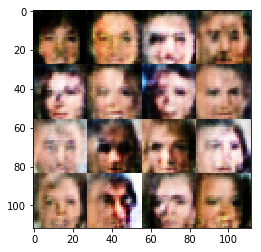

Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 0.8552
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.7852
Epoch 1/1... Discriminator Loss: 1.4195... Generator Loss: 0.6259
Epoch 1/1... Discriminator Loss: 1.3812... Generator Loss: 0.6464
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.8412
Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.8000
Epoch 1/1... Discriminator Loss: 1.3869... Generator Loss: 0.7693
Epoch 1/1... Discriminator Loss: 1.3452... Generator Loss: 0.8305
Epoch 1/1... Discriminator Loss: 1.3778... Generator Loss: 0.6945
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.7980


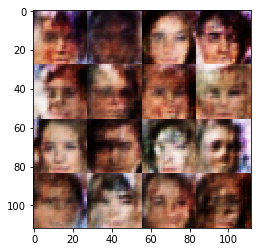

Epoch 1/1... Discriminator Loss: 1.4003... Generator Loss: 0.7788
Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 0.7907
Epoch 1/1... Discriminator Loss: 1.3651... Generator Loss: 0.7615
Epoch 1/1... Discriminator Loss: 1.3316... Generator Loss: 0.7898
Epoch 1/1... Discriminator Loss: 1.4213... Generator Loss: 0.6900
Epoch 1/1... Discriminator Loss: 1.4211... Generator Loss: 0.8381
Epoch 1/1... Discriminator Loss: 1.4001... Generator Loss: 0.7219
Epoch 1/1... Discriminator Loss: 1.3967... Generator Loss: 0.7455
Epoch 1/1... Discriminator Loss: 1.3565... Generator Loss: 0.6205
Epoch 1/1... Discriminator Loss: 1.3773... Generator Loss: 0.6451


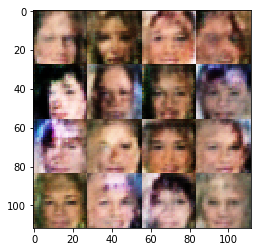

Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.8101
Epoch 1/1... Discriminator Loss: 1.3649... Generator Loss: 0.9451
Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.8474
Epoch 1/1... Discriminator Loss: 1.3297... Generator Loss: 0.8943
Epoch 1/1... Discriminator Loss: 1.3962... Generator Loss: 0.7378
Epoch 1/1... Discriminator Loss: 1.3600... Generator Loss: 0.8406
Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.6979
Epoch 1/1... Discriminator Loss: 1.3773... Generator Loss: 0.8478
Epoch 1/1... Discriminator Loss: 1.4320... Generator Loss: 0.9267
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.8741


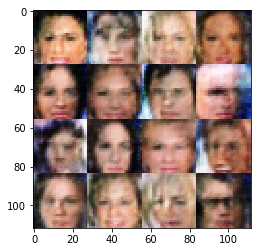

Epoch 1/1... Discriminator Loss: 1.3792... Generator Loss: 0.8368
Epoch 1/1... Discriminator Loss: 1.4201... Generator Loss: 0.6985
Epoch 1/1... Discriminator Loss: 1.4449... Generator Loss: 0.5782
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.9075
Epoch 1/1... Discriminator Loss: 1.4189... Generator Loss: 0.6630
Epoch 1/1... Discriminator Loss: 1.6104... Generator Loss: 1.0630
Epoch 1/1... Discriminator Loss: 1.3480... Generator Loss: 0.7858
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.7862
Epoch 1/1... Discriminator Loss: 1.5011... Generator Loss: 0.6035
Epoch 1/1... Discriminator Loss: 1.3491... Generator Loss: 0.8260


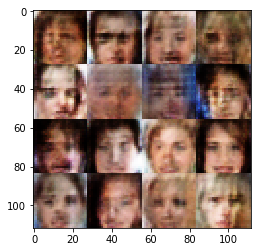

Epoch 1/1... Discriminator Loss: 1.4063... Generator Loss: 0.8666
Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 0.8717
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.7879
Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 0.6851
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.7202
Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 0.7960
Epoch 1/1... Discriminator Loss: 1.3763... Generator Loss: 0.7274
Epoch 1/1... Discriminator Loss: 1.4065... Generator Loss: 0.8738
Epoch 1/1... Discriminator Loss: 1.3604... Generator Loss: 0.8437
Epoch 1/1... Discriminator Loss: 1.3273... Generator Loss: 0.7814


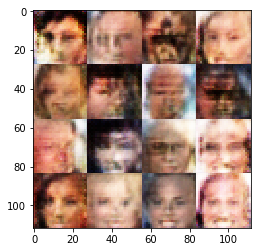

Epoch 1/1... Discriminator Loss: 1.4942... Generator Loss: 1.1058
Epoch 1/1... Discriminator Loss: 1.3405... Generator Loss: 0.8669
Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 0.8519
Epoch 1/1... Discriminator Loss: 1.3682... Generator Loss: 0.8227
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.7206
Epoch 1/1... Discriminator Loss: 1.3637... Generator Loss: 0.8446
Epoch 1/1... Discriminator Loss: 1.4063... Generator Loss: 0.6748
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.8352
Epoch 1/1... Discriminator Loss: 1.3271... Generator Loss: 0.8176
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.8939


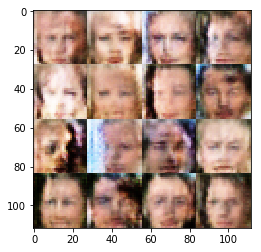

Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.7537
Epoch 1/1... Discriminator Loss: 1.3486... Generator Loss: 0.9288
Epoch 1/1... Discriminator Loss: 1.3469... Generator Loss: 0.8270
Epoch 1/1... Discriminator Loss: 1.3221... Generator Loss: 0.7169
Epoch 1/1... Discriminator Loss: 1.4107... Generator Loss: 0.9023
Epoch 1/1... Discriminator Loss: 1.3457... Generator Loss: 0.8696
Epoch 1/1... Discriminator Loss: 1.3642... Generator Loss: 0.8385
Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 0.8053
Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.9268
Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 0.8944


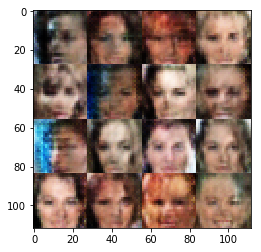

Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.7168
Epoch 1/1... Discriminator Loss: 1.3742... Generator Loss: 0.8646
Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 0.7701
Epoch 1/1... Discriminator Loss: 1.3467... Generator Loss: 0.9513
Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.8373
Epoch 1/1... Discriminator Loss: 1.4131... Generator Loss: 0.6103
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.8488
Epoch 1/1... Discriminator Loss: 1.3533... Generator Loss: 0.8921
Epoch 1/1... Discriminator Loss: 1.3822... Generator Loss: 0.7927
Epoch 1/1... Discriminator Loss: 1.3511... Generator Loss: 0.8369


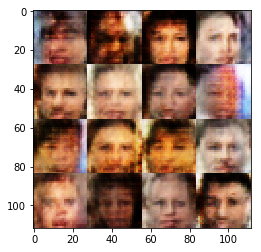

Epoch 1/1... Discriminator Loss: 1.4146... Generator Loss: 0.6899
Epoch 1/1... Discriminator Loss: 1.3377... Generator Loss: 0.7637
Epoch 1/1... Discriminator Loss: 1.4151... Generator Loss: 0.8389
Epoch 1/1... Discriminator Loss: 1.3943... Generator Loss: 0.8656
Epoch 1/1... Discriminator Loss: 1.3877... Generator Loss: 0.7911
Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 1.3613... Generator Loss: 0.7904
Epoch 1/1... Discriminator Loss: 1.3629... Generator Loss: 0.8630
Epoch 1/1... Discriminator Loss: 1.3703... Generator Loss: 0.7611
Epoch 1/1... Discriminator Loss: 1.5343... Generator Loss: 1.2633


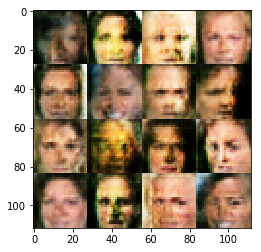

Epoch 1/1... Discriminator Loss: 1.3635... Generator Loss: 0.7892
Epoch 1/1... Discriminator Loss: 1.4228... Generator Loss: 0.6181
Epoch 1/1... Discriminator Loss: 1.3652... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.3739... Generator Loss: 0.7889
Epoch 1/1... Discriminator Loss: 1.3902... Generator Loss: 0.8409
Epoch 1/1... Discriminator Loss: 1.3626... Generator Loss: 0.6749
Epoch 1/1... Discriminator Loss: 1.3797... Generator Loss: 0.7433
Epoch 1/1... Discriminator Loss: 1.3586... Generator Loss: 0.8408
Epoch 1/1... Discriminator Loss: 1.3591... Generator Loss: 0.7515
Epoch 1/1... Discriminator Loss: 1.5544... Generator Loss: 0.4850


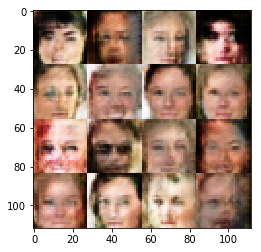

Epoch 1/1... Discriminator Loss: 1.3568... Generator Loss: 0.7548
Epoch 1/1... Discriminator Loss: 1.3564... Generator Loss: 0.8698
Epoch 1/1... Discriminator Loss: 1.3776... Generator Loss: 0.7523
Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 0.7981
Epoch 1/1... Discriminator Loss: 1.3346... Generator Loss: 0.5970
Epoch 1/1... Discriminator Loss: 1.1549... Generator Loss: 0.7712
Epoch 1/1... Discriminator Loss: 1.3356... Generator Loss: 0.7780
Epoch 1/1... Discriminator Loss: 1.2792... Generator Loss: 0.7673
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 0.9367
Epoch 1/1... Discriminator Loss: 1.3526... Generator Loss: 0.9555


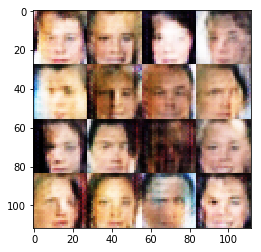

Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 0.6965
Epoch 1/1... Discriminator Loss: 1.3701... Generator Loss: 0.7951
Epoch 1/1... Discriminator Loss: 1.3557... Generator Loss: 0.9044
Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 0.6771
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.7437
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.8217
Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 0.8956
Epoch 1/1... Discriminator Loss: 1.3313... Generator Loss: 0.7958
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.7001
Epoch 1/1... Discriminator Loss: 1.2884... Generator Loss: 0.7081


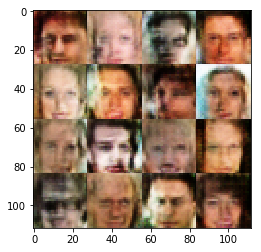

Epoch 1/1... Discriminator Loss: 1.6434... Generator Loss: 0.4455
Epoch 1/1... Discriminator Loss: 1.3715... Generator Loss: 0.7679
Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.7400
Epoch 1/1... Discriminator Loss: 1.3608... Generator Loss: 0.7808
Epoch 1/1... Discriminator Loss: 1.3694... Generator Loss: 0.7636
Epoch 1/1... Discriminator Loss: 1.2945... Generator Loss: 0.7976
Epoch 1/1... Discriminator Loss: 1.4313... Generator Loss: 0.6111
Epoch 1/1... Discriminator Loss: 1.3625... Generator Loss: 0.8545
Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 0.7818
Epoch 1/1... Discriminator Loss: 1.4246... Generator Loss: 0.6536


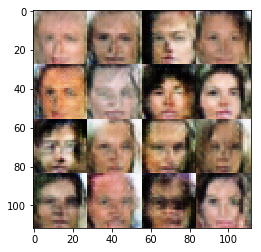

Epoch 1/1... Discriminator Loss: 1.3491... Generator Loss: 0.8633
Epoch 1/1... Discriminator Loss: 1.3578... Generator Loss: 0.8902
Epoch 1/1... Discriminator Loss: 1.3938... Generator Loss: 0.7175
Epoch 1/1... Discriminator Loss: 1.3449... Generator Loss: 0.8371
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.8295
Epoch 1/1... Discriminator Loss: 1.4061... Generator Loss: 0.7004
Epoch 1/1... Discriminator Loss: 1.3503... Generator Loss: 0.7952
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.9222
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.8581
Epoch 1/1... Discriminator Loss: 1.3972... Generator Loss: 0.6498


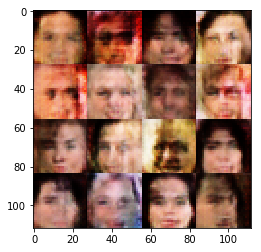

Epoch 1/1... Discriminator Loss: 1.3476... Generator Loss: 0.8939
Epoch 1/1... Discriminator Loss: 1.4013... Generator Loss: 0.5938
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.8055
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.8478
Epoch 1/1... Discriminator Loss: 1.3635... Generator Loss: 0.8063
Epoch 1/1... Discriminator Loss: 1.3165... Generator Loss: 0.7950
Epoch 1/1... Discriminator Loss: 1.3611... Generator Loss: 0.7760
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 0.8109
Epoch 1/1... Discriminator Loss: 1.3450... Generator Loss: 0.8105


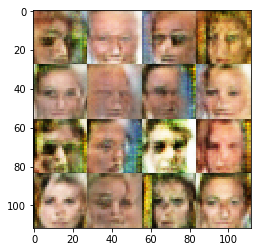

Epoch 1/1... Discriminator Loss: 1.3043... Generator Loss: 0.8652
Epoch 1/1... Discriminator Loss: 1.4477... Generator Loss: 1.0300
Epoch 1/1... Discriminator Loss: 1.3843... Generator Loss: 0.8145
Epoch 1/1... Discriminator Loss: 1.3531... Generator Loss: 0.7655
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.7862
Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 0.7882
Epoch 1/1... Discriminator Loss: 1.3469... Generator Loss: 0.8627
Epoch 1/1... Discriminator Loss: 1.3415... Generator Loss: 0.7012
Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.8072
Epoch 1/1... Discriminator Loss: 1.1673... Generator Loss: 1.0359


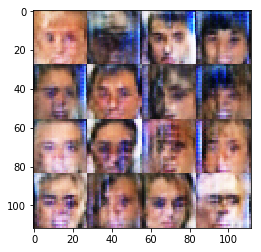

Epoch 1/1... Discriminator Loss: 1.3549... Generator Loss: 0.8430
Epoch 1/1... Discriminator Loss: 1.6690... Generator Loss: 1.0773
Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.8691
Epoch 1/1... Discriminator Loss: 1.3437... Generator Loss: 0.8963
Epoch 1/1... Discriminator Loss: 1.3768... Generator Loss: 0.6162
Epoch 1/1... Discriminator Loss: 1.5866... Generator Loss: 1.2843
Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.8795
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 0.8261
Epoch 1/1... Discriminator Loss: 1.3604... Generator Loss: 0.8875
Epoch 1/1... Discriminator Loss: 1.3308... Generator Loss: 0.8975


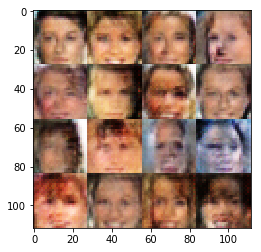

Epoch 1/1... Discriminator Loss: 1.0257... Generator Loss: 0.8484
Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 0.9498
Epoch 1/1... Discriminator Loss: 1.3210... Generator Loss: 0.9021
Epoch 1/1... Discriminator Loss: 1.3617... Generator Loss: 0.9074
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 0.6838
Epoch 1/1... Discriminator Loss: 1.3574... Generator Loss: 0.8487
Epoch 1/1... Discriminator Loss: 1.3440... Generator Loss: 0.9299
Epoch 1/1... Discriminator Loss: 1.3628... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.3313... Generator Loss: 0.7930
Epoch 1/1... Discriminator Loss: 1.2558... Generator Loss: 0.7153


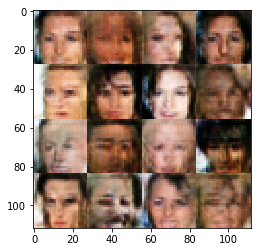

Epoch 1/1... Discriminator Loss: 1.3609... Generator Loss: 0.9361
Epoch 1/1... Discriminator Loss: 1.3135... Generator Loss: 0.6405
Epoch 1/1... Discriminator Loss: 1.3609... Generator Loss: 0.7445
Epoch 1/1... Discriminator Loss: 1.1459... Generator Loss: 0.9688
Epoch 1/1... Discriminator Loss: 1.3950... Generator Loss: 0.8865
Epoch 1/1... Discriminator Loss: 1.2315... Generator Loss: 0.7510
Epoch 1/1... Discriminator Loss: 1.3612... Generator Loss: 0.9581
Epoch 1/1... Discriminator Loss: 1.3142... Generator Loss: 0.7956
Epoch 1/1... Discriminator Loss: 1.3474... Generator Loss: 0.8124
Epoch 1/1... Discriminator Loss: 1.2965... Generator Loss: 0.7804


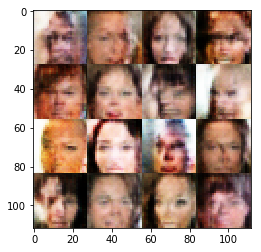

Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.8238
Epoch 1/1... Discriminator Loss: 1.5337... Generator Loss: 1.1648
Epoch 1/1... Discriminator Loss: 1.3683... Generator Loss: 0.8316
Epoch 1/1... Discriminator Loss: 1.3045... Generator Loss: 0.8177
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.8128
Epoch 1/1... Discriminator Loss: 1.2297... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.2253... Generator Loss: 0.6898
Epoch 1/1... Discriminator Loss: 1.3391... Generator Loss: 0.8811
Epoch 1/1... Discriminator Loss: 1.3186... Generator Loss: 0.7912
Epoch 1/1... Discriminator Loss: 1.3551... Generator Loss: 0.8097


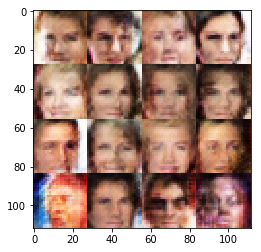

Epoch 1/1... Discriminator Loss: 1.3812... Generator Loss: 0.7942
Epoch 1/1... Discriminator Loss: 1.3146... Generator Loss: 0.8958
Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 0.8175
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 0.9392
Epoch 1/1... Discriminator Loss: 1.3353... Generator Loss: 0.7404
Epoch 1/1... Discriminator Loss: 1.2300... Generator Loss: 0.8511
Epoch 1/1... Discriminator Loss: 1.3736... Generator Loss: 0.8079
Epoch 1/1... Discriminator Loss: 1.3587... Generator Loss: 0.7934
Epoch 1/1... Discriminator Loss: 1.3078... Generator Loss: 0.8762
Epoch 1/1... Discriminator Loss: 1.3654... Generator Loss: 0.8275


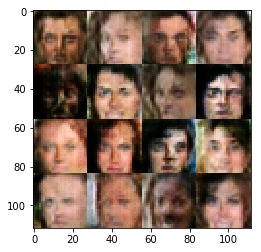

Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 0.7734
Epoch 1/1... Discriminator Loss: 1.3502... Generator Loss: 0.8280
Epoch 1/1... Discriminator Loss: 1.3649... Generator Loss: 0.7817
Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.7402
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 1.0818
Epoch 1/1... Discriminator Loss: 1.2593... Generator Loss: 0.8867
Epoch 1/1... Discriminator Loss: 1.3122... Generator Loss: 0.8289
Epoch 1/1... Discriminator Loss: 1.3697... Generator Loss: 0.7581
Epoch 1/1... Discriminator Loss: 1.2910... Generator Loss: 0.7860
Epoch 1/1... Discriminator Loss: 1.3757... Generator Loss: 0.8536


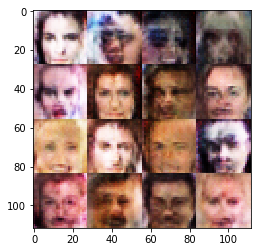

Epoch 1/1... Discriminator Loss: 1.3392... Generator Loss: 0.8998
Epoch 1/1... Discriminator Loss: 1.3946... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.6707
Epoch 1/1... Discriminator Loss: 1.3915... Generator Loss: 0.7267
Epoch 1/1... Discriminator Loss: 1.3847... Generator Loss: 0.8381
Epoch 1/1... Discriminator Loss: 1.3666... Generator Loss: 0.8906
Epoch 1/1... Discriminator Loss: 1.3493... Generator Loss: 0.8326
Epoch 1/1... Discriminator Loss: 1.3800... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 1.2835... Generator Loss: 0.7896
Epoch 1/1... Discriminator Loss: 1.3951... Generator Loss: 0.6962


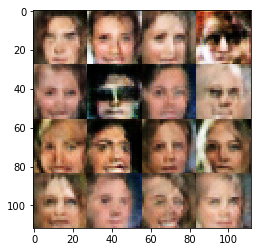

Epoch 1/1... Discriminator Loss: 1.4264... Generator Loss: 0.7165
Epoch 1/1... Discriminator Loss: 1.3293... Generator Loss: 0.7295
Epoch 1/1... Discriminator Loss: 1.3642... Generator Loss: 0.8577
Epoch 1/1... Discriminator Loss: 1.3706... Generator Loss: 0.8393
Epoch 1/1... Discriminator Loss: 1.3271... Generator Loss: 0.7896
Epoch 1/1... Discriminator Loss: 1.5251... Generator Loss: 0.5396
Epoch 1/1... Discriminator Loss: 1.3908... Generator Loss: 0.5942
Epoch 1/1... Discriminator Loss: 1.3506... Generator Loss: 0.7313
Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.6041
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 0.7839


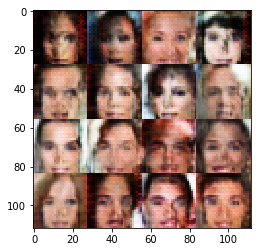

Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.8362
Epoch 1/1... Discriminator Loss: 1.2749... Generator Loss: 0.7445
Epoch 1/1... Discriminator Loss: 1.3188... Generator Loss: 0.7452
Epoch 1/1... Discriminator Loss: 1.3679... Generator Loss: 0.8718
Epoch 1/1... Discriminator Loss: 1.3650... Generator Loss: 0.8506
Epoch 1/1... Discriminator Loss: 1.3324... Generator Loss: 0.7451
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.8345
Epoch 1/1... Discriminator Loss: 1.3312... Generator Loss: 0.8210
Epoch 1/1... Discriminator Loss: 1.3043... Generator Loss: 1.0335
Epoch 1/1... Discriminator Loss: 1.3610... Generator Loss: 0.7999


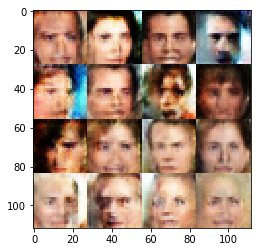

Epoch 1/1... Discriminator Loss: 1.3393... Generator Loss: 0.8775
Epoch 1/1... Discriminator Loss: 1.3309... Generator Loss: 0.8004
Epoch 1/1... Discriminator Loss: 1.3672... Generator Loss: 0.8135
Epoch 1/1... Discriminator Loss: 1.3292... Generator Loss: 0.8641
Epoch 1/1... Discriminator Loss: 1.2615... Generator Loss: 0.7097
Epoch 1/1... Discriminator Loss: 1.3136... Generator Loss: 0.8037


In [34]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.